<a href="https://colab.research.google.com/github/fcoelhomrc/MachineLearning/blob/main/ML_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3

### Student 1: Rita Isabel Ferreira Duarte
### Student 2: Felipe Coelho Moreira Ribeiro Coutinho

## 1. Neural Networks

Consider the following fully connected neural network. It consists of an input layer, three hidden layers and an output layer. The first hidden layer utilized ReLU as its non-linearity function, whereas the second uses Tanh and the last uses the Sigmoid function. The output layer also utilizes the Sigmoid function. Consider $W_1, W_2, W_3 $and $W_4$ as a set of weight parameters, $x$ as your input, $y$ as the ground-truth and $\hat{y}$ as the network prediction/output. 

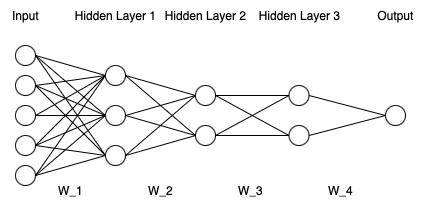

### 1.1 (Pen and Paper) 

##### Note that python should not be used.

**a)** How many parameters does this network have? Do not forget to include the bias in the three hidden layers and the output layer.  Explicitly show how you achieved your answer. 

We take each $W$ as the weight matrix used at each layer, together with a bias vector $b$.

Since $W_1$ projects from 5-dimensional input to 3-dimensional hidden layer 1 input, it must be a $3\times 5$ matrix. This accounts for 15 parameters; considering the 3-dimensional bias, it goes up to 18 parameters.

Following the same reasoning, $W_2$ is a $2 \times 3$ matrix. This amounts for more $6 + 2 = 8$, including bias. 

$W_3$ is a $2 \times 2$ matrix, leading up to an additional $4+2=6$ parameters.

Finally, $W_4$ is a $1 \times 2$ matrix, which sums to $2+1=3$. 



Thus, the total number of parameters is given by $18 + 8 + 6 + 3 = 35$.

**b)** Considering the following cost/loss function $C(\hat{y}) = \frac{1}{2}||\hat{y} - y||^2$, derive $\frac{\partial C}{\partial W_1}$. Explicitly show the relation between $\frac{\partial C}{\partial W_1}$ and $\frac{\partial C}{\partial W_2}$.

Throughout the following computations, consider:

$$
\begin{align}
h^{(n)} &= a(z^{(n)}) \\
z^{(n)} &= W_n h^{(n-1)} + b_n
\end{align}
$$

where $a$ is some nonlinear activation function to be applied element-wise, $n$ indexes the layer. Of course, thinking of $W$ as matrices, then $h, z$ are vectors. To simplify the notation, we write the derivatives for backpropagation treating them as scalars, where it is implied that what we really mean is

$$
\begin{align}
h^{(n)}_k &= a(z^{(n)}_k) \\
z^{(n)}_k &= \sum_l W_n^{lk} h^{(n-1)}_k + b_n^k
\end{align}
$$

Backpropagation can then be written as:

$$
\begin{align}
\frac{\partial  C}{\partial W_1} &= 
\frac{\partial C}{\partial h^{(4)}} 
\frac{\partial h^{(4)}}{\partial z^{(4)}} 
\frac{\partial z^{(4)}}{\partial h^{(3)}} 
\frac{\partial h^{(3)}}{\partial z^{(3)}} 
\frac{\partial z^{(3)}}{\partial h^{(2)}} 
\frac{\partial h^{(2)}}{\partial z^{(2)}} 
\frac{\partial z^{(2)}}{\partial h^{(1)}} 
\frac{\partial h^{(1)}}{\partial z^{(1)}} 
\frac{\partial z^{(1)}}{\partial W_1}
\end{align}
$$

and each derivative is evaluated as

$$
\begin{align}
\frac{\partial C}{\partial h^{(4)}} &= \hat{y} - y \\
\frac{\partial h^{(4)}}{\partial z^{(4)}} &= \sigma(z^{(4)})(1 - \sigma(z^{(4)}))\\
\frac{\partial z^{(4)}}{\partial h^{(3)}} &= W_4 \\
\frac{\partial h^{(3)}}{\partial z^{(3)}} &= \sigma(z^{(3)})(1 - \sigma(z^{(3)}))\\
\frac{\partial z^{(3)}}{\partial h^{(2)}} &= W_3 \\
\frac{\partial h^{(2)}}{\partial z^{(2)}} &= 1 - \tanh^2(z^{(2)})
\\
\frac{\partial z^{(2)}}{\partial h^{(1)}} &= W_2 \\
\frac{\partial h^{(1)}}{\partial z^{(1)}} &= u(z^{(1)}) \\
\frac{\partial z^{(1)}}{\partial W_1} &= x
\end{align}
$$

where $\sigma$ stands for the sigmoid function and $u$ for the step function 

$$
u(\xi) =
\begin{cases}
1, \quad \textrm{if } \xi \ge 0, \\
0, \quad \textrm{else}
\end{cases}
$$

Now, for showing the relationship between $\frac{\partial C}{\partial W_1}$ and $\frac{\partial C}{\partial W_2}$, consider:

$$
\frac{\partial  C}{\partial W_2} =
\underbrace{
\frac{\partial C}{\partial h^{(4)}} 
\frac{\partial h^{(4)}}{\partial z^{(4)}} 
\frac{\partial z^{(4)}}{\partial h^{(3)}} 
\frac{\partial h^{(3)}}{\partial z^{(3)}} 
\frac{\partial z^{(3)}}{\partial h^{(2)}} 
\frac{\partial h^{(2)}}{\partial z^{(2)}} 
}_{\textrm{common}} 
\frac{\partial z^{(2)}}{\partial W_2}
$$

$$
\begin{align}
\frac{\partial  C}{\partial W_1} &=
\underbrace{
\frac{\partial C}{\partial h^{(4)}} 
\frac{\partial h^{(4)}}{\partial z^{(4)}} 
\frac{\partial z^{(4)}}{\partial h^{(3)}} 
\frac{\partial h^{(3)}}{\partial z^{(3)}} 
\frac{\partial z^{(3)}}{\partial h^{(2)}} 
\frac{\partial h^{(2)}}{\partial z^{(2)}} 
}_{\textrm{common}}
\frac{\partial z^{(2)}}{\partial h^{(1)}} 
\frac{\partial h^{(1)}}{\partial z^{(1)}} 
\frac{\partial z^{(1)}}{\partial W_1} \\
&= \frac{\partial  C}{\partial W_2} \left( \frac{\partial z^{(2)}}{\partial W_2} \right)^{-1} \frac{\partial z^{(2)}}{\partial h^{(1)}} 
\frac{\partial h^{(1)}}{\partial z^{(1)}} 
\frac{\partial z^{(1)}}{\partial W_1}
\end{align}
$$


**c)** What is the behaviour of the network if we initialize all weights to zero? What causes such behaviour? 

If all weights start at zero, during the first forward pass:

- No matter the input $x$, it is mapped to zero before applying $\operatorname{ReLU}$ activation, whose output is then zero
- The next layer recieves only zeros, and the $\tanh$ activation also evaluates to zero
- Next, the sigmoid activation recieves only zeros, but this time they are mapped to $\frac{1}{2}$
- Finally, these activation map is again transformed in zeros, and the final output activation evaluates to $\frac{1}{2}$ everywhere.

For the backpropagation, looking at the expression derived in the previous question, we quickly realize that **the gradient will vanish** since every weight is zero! No matter the initial input.

Thus, gradient descent will not be able to update any weights, and the network will fail to train no matter the learning rate we pick. 

## 2. Neural Networks

### (Python Exercise)

Consider the `heightWeightData.txt` dataset that you have used in the Lab classes. You will use this data to build a Neural Network classifier that predicts the sex of an individual given their height and weight.

**a)** Train a fully-connected neural network classifier, with less than **20 parameters**, **using only the first 120 rows** of the dataset as training data. You should use the Keras framework. Utilize sigmoid as the non-linearity function, SGD as the optimizer, a batch size of 120, and a learning rate of 0,001. Do not change other configuration besides the number and size of the hidden layers, and the others previously mentioned. **Print the values of the learned parameters.**

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
# Some parameters for training/defining model
input_shape = 2,
learning_rate = 1e-3
batch_size = 120
num_epochs = 100

# Load data and split train/test sets
data = np.loadtxt("heightWeightData.txt", delimiter=",")
x_train, y_train = data[:120, 1:], data[:120, 0]
x_test, y_test = data[120:, 1:], data[120:, 0]

# # Preprocess data
# means = x_train.mean(axis=0)
# stds = x_train.std(axis=0)
# x_train = (x_train - means)/stds

# means = x_test.mean(axis=0)
# stds = x_test.std(axis=0)
# x_test = (x_test - means)/stds

y_train -= 1; y_test -= 1 # Convert labels from (1,2) to (0,1)

# # Check data imbalance
# print(np.unique(data[:, 0], return_counts=True))

# Define optimizer
optimizer = tf.keras.optimizers.SGD(
    learning_rate=learning_rate
)

# Define model
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(3, activation="sigmoid", input_shape=input_shape),
        tf.keras.layers.Dense(2, activation="sigmoid"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ]
)

model.summary()

# Compile model
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name="acc"),
    ],
)

# Fit model
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=num_epochs,
    verbose=0
)

# # Clear training information from display
# from IPython.display import clear_output
# clear_output()

# Print trained parameters
weights = model.get_weights()
print(weights)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 9         
                                                                 
 dense_1 (Dense)             (None, 2)                 8         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________
[array([[ 0.7908193 , -0.09863567, -0.32342672],
       [ 0.5480553 , -1.0877513 ,  0.07672656]], dtype=float32), array([ 0.0000000e+00,  8.8287390e-32, -1.0822966e-22], dtype=float32), array([[-0.00163471,  0.21287675],
       [ 1.0360034 , -0.6221205 ],
       [-0.78376865,  0.10676658]], dtype=float32), array([-6.545670

**b)** Compute the predictions of your model in the remaining 90 rows of the dataset and report the classification accuracy of your model in this test set.

In [3]:
print("Evaluate model on test data")
results = model.evaluate(x_test, y_test, batch_size=batch_size)
print("test loss, test acc:", results)

Evaluate model on test data
1/1 [==============================] - 0s 278ms/step - loss: 0.6184 - acc: 0.7000
test loss, test acc: [0.6183963418006897, 0.699999988079071]


**c)** Repeat a) and b) with a network with up to **400 parameters**. There is no need to print the learned parameters.

In [4]:
num_epochs = 100

# Define model
model_2 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(5, activation="sigmoid", input_shape=input_shape),
        tf.keras.layers.Dense(10, activation="sigmoid"),
        tf.keras.layers.Dense(14, activation="sigmoid"),
        tf.keras.layers.Dense(10, activation="sigmoid"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ]
)

model_2.summary()

# Compile model
model_2.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name="acc"),
    ],
)

# Fit model
history = model_2.fit(
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=num_epochs,
)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 15        
                                                                 
 dense_4 (Dense)             (None, 10)                60        
                                                                 
 dense_5 (Dense)             (None, 14)                154       
                                                                 
 dense_6 (Dense)             (None, 10)                150       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 390
Trainable params: 390
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 1s 82

In [5]:
print("Evaluate model on test data")
results = model_2.evaluate(x_test, y_test, batch_size=batch_size)
print("test loss, test acc:", results)

Evaluate model on test data
1/1 [==============================] - 0s 233ms/step - loss: 0.6269 - acc: 0.7000
test loss, test acc: [0.626914918422699, 0.699999988079071]


**d)** Repeat c), but add $L_2$ regularization.  Try the all following **$\lambda \in$  {0.1, 0.3, 0.5, 0.9}.**

In [6]:
num_epochs = 100

results = {}

for reg in [0.1, 0.3, 0.5, 0.9]:
  # Define model
  model_reg = tf.keras.Sequential(
      [
          tf.keras.layers.Dense(5, activation="sigmoid", kernel_regularizer=tf.keras.regularizers.l2(l2=reg), input_shape=input_shape),
          tf.keras.layers.Dense(10, activation="sigmoid", kernel_regularizer=tf.keras.regularizers.l2(l2=reg)),
          tf.keras.layers.Dense(14, activation="sigmoid", kernel_regularizer=tf.keras.regularizers.l2(l2=reg)),
          tf.keras.layers.Dense(10, activation="sigmoid", kernel_regularizer=tf.keras.regularizers.l2(l2=reg)),
          tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l2(l2=reg), activation="sigmoid")
      ]
  )


  # Compile model
  model_reg.compile(
      optimizer=optimizer,
      loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
      metrics=[
          tf.keras.metrics.BinaryAccuracy(name="acc"),
      ],
  )

  # Fit model
  history = model_reg.fit(
      x=x_train,
      y=y_train,
      batch_size=batch_size,
      epochs=num_epochs,
      verbose=0
  )

  # Evaluate on test data
  temp = model_reg.evaluate(x_test, y_test, batch_size=batch_size)

  results[reg] = temp[1]

results

1/1 [==============================] - 1s 529ms/step - loss: 11.2697 - acc: 0.3000


1/1 [==============================] - 1s 522ms/step - loss: 16.2181 - acc: 0.7000


1/1 [==============================] - 0s 435ms/step - loss: 21.5984 - acc: 0.7000


{0.1: 0.30000001192092896,
 0.3: 0.30000001192092896,
 0.5: 0.699999988079071,
 0.9: 0.699999988079071}

**e)** Repeat c), but increase the learning rate to the following values {0.01, 10, 100}. Can you explain the behaviour of the model?  

In [7]:
num_epochs = 100

results = {}

for lr in [1e-2, 10, 100]:
  learning_rate = lr

  # Define model
  model_lr = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(5, activation="sigmoid", input_shape=input_shape),
        tf.keras.layers.Dense(10, activation="sigmoid"),
        tf.keras.layers.Dense(14, activation="sigmoid"),
        tf.keras.layers.Dense(10, activation="sigmoid"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ]
)



  # Compile model
  model_lr.compile(
      optimizer=optimizer,
      loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
      metrics=[
          tf.keras.metrics.BinaryAccuracy(name="acc"),
      ],
  )

  # Fit model
  history = model_lr.fit(
      x=x_train,
      y=y_train,
      batch_size=batch_size,
      epochs=num_epochs,
      verbose=0
  )

  # Evaluate on test data
  temp = model_lr.evaluate(x_test, y_test, batch_size=batch_size)

  results[lr] = temp[1]

results

1/1 [==============================] - 0s 130ms/step - loss: 0.7422 - acc: 0.3000


{0.01: 0.699999988079071, 10: 0.30000001192092896, 100: 0.30000001192092896}

# Note

For the second part, the model would not converge to a solution in any of the items proposed. After training, it would predict always one of the two classes; since this is not an imbalanced dataset, this likely means that the model failed to learn. Not even normalizing the data prior to training changed this behavior.

Instead, we attempt solving the problem again without taking the previously imposed restrictions into consideration. To keep the comparisons fair, we stick to a maximum of 400 (trainable) parameters, but proceed to use different optimizers, activation functions, and add batch normalization.

In [36]:
# Some parameters for training/defining model
input_shape = 2,
learning_rate = 1e-4
batch_size = 120
num_epochs = 500

# Load data and split train/test sets
data = np.loadtxt("heightWeightData.txt", delimiter=",")
x_train, y_train = data[:120, 1:], data[:120, 0]
x_test, y_test = data[120:, 1:], data[120:, 0]

y_train -= 1
y_test -= 1

# Define optimizer
optimizer = tf.keras.optimizers.Adam(
    lr=learning_rate,
)


# Define model
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(5, input_shape=input_shape, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.BatchNormalization(),
     
        tf.keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.BatchNormalization(),
        
        tf.keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.BatchNormalization(),
     
        tf.keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.BatchNormalization(),
     
        tf.keras.layers.Dense(1, activation="sigmoid")
    ]
)

model.build(input_shape=input_shape)

# Compile model
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name="acc"),
    ],
)

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 5)                 15        
                                                                 
 batch_normalization_28 (Bat  (None, 5)                20        
 chNormalization)                                                
                                                                 
 dense_79 (Dense)            (None, 10)                60        
                                                                 
 batch_normalization_29 (Bat  (None, 10)               40        
 chNormalization)                                                
                                                                 
 dense_80 (Dense)            (None, 10)                110       
                                                                 
 batch_normalization_30 (Bat  (None, 10)             

In [37]:
# Fit model
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=num_epochs,
    verbose=0,
    validation_split=0.2
)

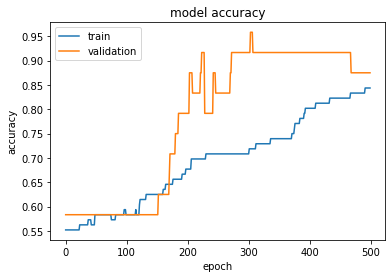

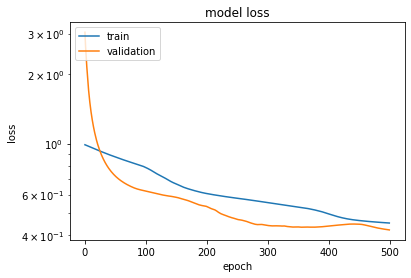

In [38]:
import matplotlib.pyplot as plt

# Plot history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# Plot history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.yscale('log')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [39]:
print("Evaluate model on test data")
results = model.evaluate(x_test, y_test, batch_size=batch_size)
print("test loss, test acc:", results)

Evaluate model on test data
1/1 [==============================] - 0s 28ms/step - loss: 0.4032 - acc: 0.8889
test loss, test acc: [0.4031849205493927, 0.8888888955116272]


In [98]:
import pandas as pd
# Some data visualization

hist, bins = np.histogram(data[:, 2], bins=5)
digitized = np.digitize(data[:, 2], bins)
my_data = np.hstack((data, digitized[:, np.newaxis]))

dataframe = pd.DataFrame(data=my_data, columns=["label", "height", "weight", "weight_classes"])
dataframe["label"] = dataframe["label"].astype(int)
# dataframe = dataframe.drop("label", axis=1)
dataframe

,label,height,weight,weight_classes
0,0,170.18,56.700,1.0
1,1,172.72,63.504,2.0
2,1,170.18,64.411,2.0
3,1,152.40,49.896,1.0
4,1,162.56,43.999,1.0
...,...,...,...,...
205,0,200.66,74.844,2.0
206,0,190.50,72.576,2.0
207,0,180.34,77.111,3.0
208,1,165.10,53.071,1.0


In [99]:
bins

array([ 43.092 ,  59.8756,  76.6592,  93.4428, 110.2264, 127.01  ])

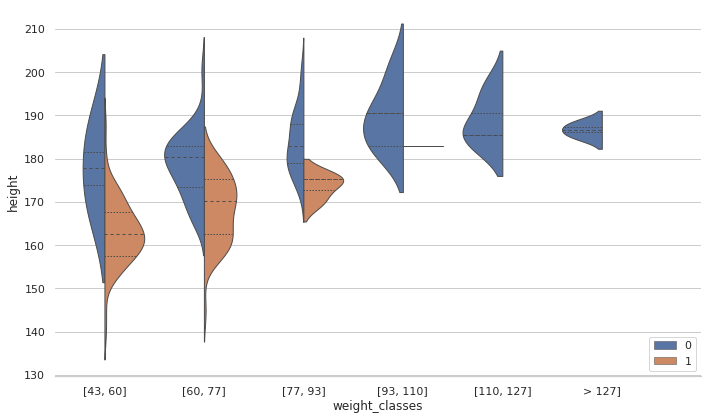

In [106]:
import seaborn as sns
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.violinplot(data=dataframe, x="weight_classes", y="height", hue="label",
               split=True, inner="quart", linewidth=1)
sns.despine(left=True)
plt.legend(loc='lower right')
_ = plt.xticks([0, 1, 2, 3, 4, 5, 6], labels=["[43, 60]", "[60, 77]", "[77, 93]", "[93, 110]", "[110, 127]", "> 127]"])
plt.tight_layout()